In [57]:
import math
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np
from IPython.display import HTML

def sense(x):
    return x

def simulate(delta_t, x, u):
    x += delta_t * u
    return x

def get_robot_path(tf, dt, start_x, start_y, control_policy):
    time = np.linspace(0.,tf, int(tf / dt) + 1)  
    x = np.array([start_x, start_y])
    x_log = [np.copy(x)]

    for t in time:
        y = sense(x)
        u = control_policy(t, y)    
        x = simulate(dt, x, u)
        x_log.append(np.copy(x))
        
    x_log = np.array(x_log)
    return x_log, time

def animate_path(path, time):
    fig, ax = plt.subplots()

    ax.set_aspect('equal', adjustable='box')

    def animate(t):
        ax.clear()
        
        # Path
        plt.plot(path[:,0], path[:,1], 'r--')
        
        # Initial conditions
        plt.plot(path[t,0], path[t,1], 'bo')
        
    return animation.FuncAnimation(fig, animate, frames=len(time), interval=60)

#### Part 1a: Line Trajectory

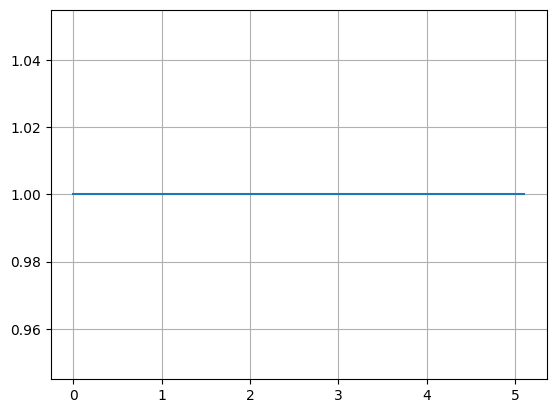

In [58]:
def line_control(t, y):
    ux = 1  
    uy = 0  # derivative for straight line is 0
    return np.array([ux, uy])

tf = 5.0
dt = 0.1   
line_path, time = get_robot_path(tf, dt, 0.0, 1.0, line_control)

plt.grid()
plt.plot(line_path[:,0], line_path[:,1])

#### Part 1b: Circle Trajectory

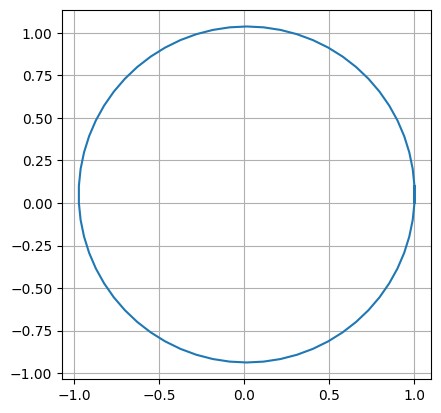

In [60]:
def circle_control(t, y):
    ux = -np.sin(t) 
    uy = np.cos(t) 
    return np.array([ux, uy])

tf = 2 * math.pi
dt = 0.1   
circle_path, time = get_robot_path(tf, dt, 1.0, 0.0, circle_control)

plt.grid()
plt.gca().set_aspect('equal')  # ensure equal ratio of axes
plt.plot(circle_path[:,0], circle_path[:,1])

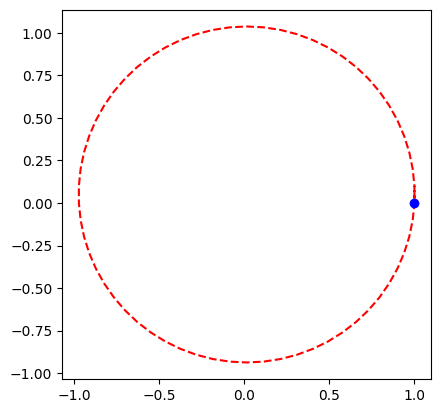

In [61]:
anim = animate_path(circle_path, time)
HTML(anim.to_jshtml())

#### Part 2: Ellipse Trajectory (Chapter 2 Exercise 1)

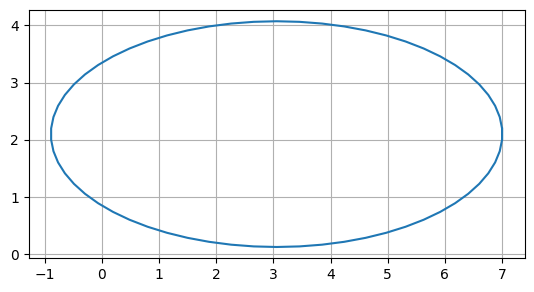

In [65]:
def ellipse_control(t, y):
    # major axis = 4 --> multiply ux by 4
    # minor axis = 2 --> multiply uy by 2
    ux = -4 * np.sin(t) 
    uy = 2 * np.cos(t)  
    return np.array([ux, uy])

tf = 2 * math.pi
dt = 0.1   
ellipse_path, time = get_robot_path(tf, dt, 7.0, 2.0, ellipse_control)

plt.grid()
plt.gca().set_aspect('equal')  # ensure equal ratio of axes
plt.plot(ellipse_path[:,0], ellipse_path[:,1])

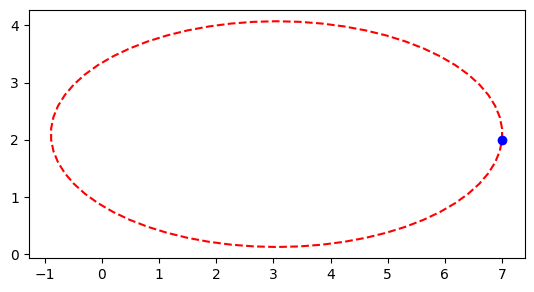

In [66]:
anim = animate_path(ellipse_path, time)
HTML(anim.to_jshtml())